# Spectrum Visualization

## Helper funcs

In [2]:
import math

def load_sample_file(f):
    ret = {
        'sample_rate': None,
        'duration': None,
        'data': None
    }
    with open(f) as fp:
        sample_rate_s, duration_s, group_cnt = fp.readline().split(',')
        sample_rate, duration = float(sample_rate_s), float(duration_s)
        line_cnt = math.ceil(int(sample_rate * duration))
        ret['sample_rate'] = sample_rate
        ret['duration'] = duration
        ret['data'] = [
            float(point)
            for line in [fp.readline() for _ in range(int(line_cnt))]
            for point in line.split(',')
            if line
        ]
    return ret

## Load sample file

In [3]:
import numpy as np

def mag(cmplx):
    return cmplx.real * cmplx.real + cmplx.imag * cmplx.imag

def fft(data):
    return np.fft.fft(data)

sample_data = load_sample_file('sample_snaps_44100_1.sample')
sample_data_data_np = np.asarray(sample_data['data'])
sample_rate = sample_data['sample_rate']
duration = sample_data['duration']

## Plot

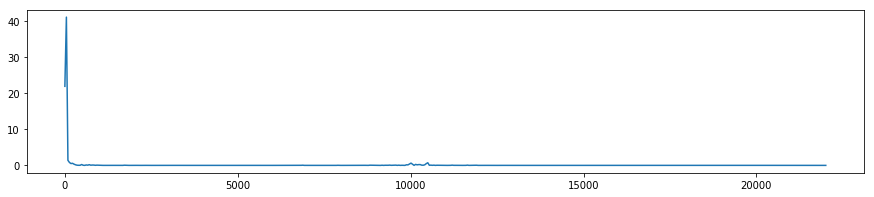

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
from IPython import display

_WINDOW = 1000
_SLOT_WIDTH = sample_rate / _WINDOW

plt.rcParams["figure.figsize"] = (15,3)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

vfunc = np.vectorize(lambda x: mag(x))
for i in range(min(sample_data_data_np.size // _WINDOW, 40)):
    freq_slice_size = _WINDOW // 2
    sample_slice = fft(sample_data_data_np[i*_WINDOW:(i+1)*_WINDOW])
    sample_slice = sample_slice[:freq_slice_size]
    sample_slice = np.vectorize(lambda x: x*2)(sample_slice)
    freq_slice = vfunc(sample_slice)
    plt.clf()
    plt.plot(np.asarray([i * _SLOT_WIDTH for i in range(freq_slice_size)]), freq_slice)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)